In [1]:
%%markdown
# AI Apps Project: "Bank Marketing Campaign"
## Norberti Simone && Genovasi Francesco

# AI Apps Project: "Bank Marketing Campaign"
## Norberti Simone && Genovasi Francesco


In [2]:
%%markdown
# Import e analisi del Dataset

# Import e analisi del Dataset


In [3]:
import pandas as pd
def load_bank_data(): 
    csv_path = "bank.csv"
    return pd.read_csv(csv_path)

bank = load_bank_data()
print("bank.shape:", bank.shape)
print("First 5 rows:")
bank.head()

bank.shape: (11162, 17)
First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.describe() # solo dati numerici

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


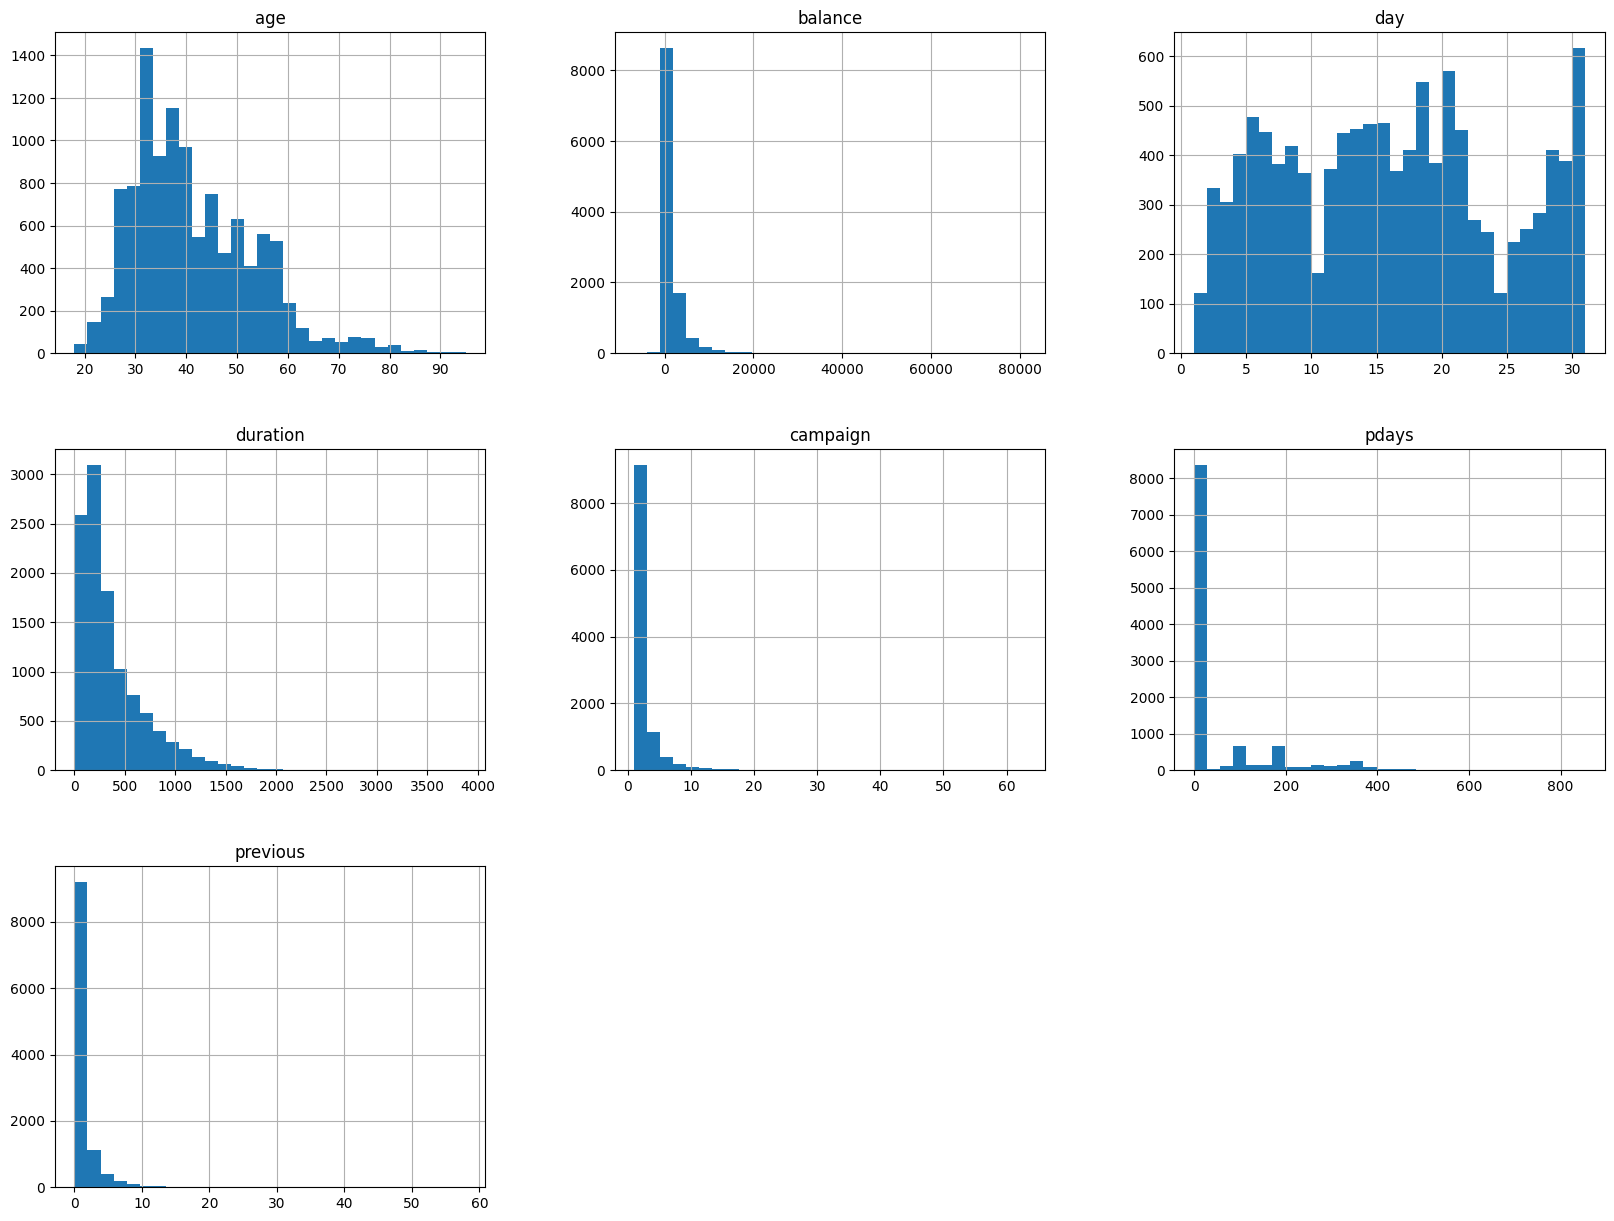

In [6]:
import matplotlib.pyplot as plt
bank.hist(bins=30, figsize=(20,15))
plt.show()
# vengono mostrati gli istogrammi solo di dati numerici

In [7]:
bank["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [8]:
bank["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [9]:
bank["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [10]:
bank["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [11]:
bank["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [12]:
bank["loan"].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [13]:
bank["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [14]:
bank["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [15]:
bank["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [16]:
bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [17]:
bank_with_id = bank.reset_index() # adds an `index` column

In [18]:
bank_with_id.head()

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [19]:
%%markdown
# Pre-processing

# Pre-processing


In [20]:
import numpy as np
bank["age_bin"] = pd.cut(bank["age"],
                               bins=[0., 30, 60, np.inf],
                               labels=[1, 2, 3])

In [21]:
# bank[120:180]

In [22]:
bank = bank.drop(labels=['age'], axis=1)

In [23]:
'''
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank, bank["deposit"]):
    strat_train_set = bank.loc[train_index]
    strat_test_set = bank.loc[test_index]
'''

'\nfrom sklearn.model_selection import StratifiedShuffleSplit\n\nsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\nfor train_index, test_index in split.split(bank, bank["deposit"]):\n    strat_train_set = bank.loc[train_index]\n    strat_test_set = bank.loc[test_index]\n'

In [24]:
#strat_test_set.head()

In [25]:
# bank["deposit"].value_counts()/len(bank)

In [26]:
# strat_train_set["deposit"].value_counts()/len(strat_train_set)

In [27]:
# strat_test_set["deposit"].value_counts()/len(strat_test_set)

In [28]:
%%markdown
### Valori null: scegliere tra questi 3 approcci: median, drop attr, drop rows
### If there were missing values we will have to fill them with the median, mean or mode.

### Valori null: scegliere tra questi 3 approcci: median, drop attr, drop rows
### If there were missing values we will have to fill them with the median, mean or mode.


In [29]:
num_attribs = ["balance","day","duration","campaign","pdays", "previous", "age_bin"]
cat_attribs = ["job", "marital", "education", "default", "housing", "loan",
              "contact", "month", "poutcome", "deposit"]

# bank_num = strat_train_set.drop(cat_attribs, axis=1)
bank_num = bank.drop(cat_attribs, axis=1)
bank_tr = pd.DataFrame(bank_num, columns=bank_num.columns)

In [30]:
# bank_tr.columns.values.tolist()

In [31]:
bank_tr.describe()

,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [32]:

# bank_num_tr = numerical_pipeline.fit_transform(bank_num)
# bank_num_tr_df = pd.DataFrame(bank_num_tr, columns=num_attribs)

In [33]:
# bank_num_tr[0]

In [34]:
''' (non usato)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ["age", "balance","day","duration","campaign","pdays", "previous"]
cat_attribs = ["job", "marital", "education", "default", "housing", "loan",
              "contact", "month", "poutcome", "deposit"]
     
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, num_attribs),
    ("cat", OrdinalEncoder(), cat_attribs),
])

bank_prepared = full_pipeline.fit_transform(strat_train_set)
bank_prepared[0]
'''

' (non usato)\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OrdinalEncoder\n\nnum_attribs = ["age", "balance","day","duration","campaign","pdays", "previous"]\ncat_attribs = ["job", "marital", "education", "default", "housing", "loan",\n              "contact", "month", "poutcome", "deposit"]\n     \nfull_pipeline = ColumnTransformer([\n    ("num", numerical_pipeline, num_attribs),\n    ("cat", OrdinalEncoder(), cat_attribs),\n])\n\nbank_prepared = full_pipeline.fit_transform(strat_train_set)\nbank_prepared[0]\n'

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ["balance","day","duration","campaign","pdays", "previous"]
bin_attribs = ["default", "housing", "loan", "deposit"]
cat_attribs = ["age_bin", "job", "marital", "education", "contact", "month", "poutcome"]

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
     ])
     
full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, num_attribs),
    ("bin", OrdinalEncoder(), bin_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# bank_prepared = full_pipeline.fit_transform(strat_train_set)
bank_transformed = full_pipeline.fit_transform(bank)
# bank_transformed[0]

In [66]:
# bank_transformed[0]

array([ 0.25252514, -1.26574556,  1.93022589, -0.55416834, -0.48118405,
       -0.36325984,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ])

In [67]:
#full_pipeline.named_transformers_['cat'].categories_

[array([1, 2, 3]),
 array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [37]:
cat_onehot = ['age0-30', 'age30-60', 'age60-95',
              'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 
              'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 
              'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 
              'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 
              'contact_cellular', 
              'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 
              'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 
              'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
attrs = num_attribs + bin_attribs + cat_onehot
bank_transformed_df = pd.DataFrame(bank_transformed, columns=attrs)

In [69]:
# bank_transformed_df.head()

,balance,day,duration,campaign,pdays,previous,default,housing,loan,deposit,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
corr_matrix = bank_transformed_df.corr()
corr_matrix["deposit"].sort_values(ascending=False)

deposit                1.000000
duration               0.451919
poutcome_success       0.286642
contact_cellular       0.223252
age60-95               0.167604
pdays                  0.151593
previous               0.139867
month_mar              0.135438
month_oct              0.133783
month_sep              0.126901
job_retired            0.103827
job_student            0.099953
marital_single         0.094632
education_tertiary     0.094598
month_apr              0.090975
age0-30                0.090643
month_dec              0.086964
balance                0.081129
month_feb              0.051710
poutcome_other         0.044059
job_management         0.036301
job_unemployed         0.033487
poutcome_failure       0.020714
contact_telephone      0.016420
education_unknown      0.014355
marital_divorced       0.005228
job_unknown            0.001889
job_admin.            -0.000610
job_self-employed     -0.004707
job_technician        -0.011557
month_aug             -0.016621
month_ju

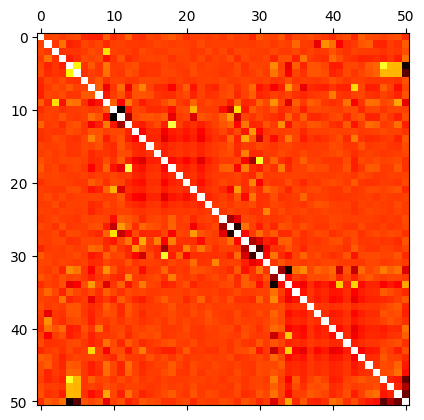

In [40]:
plt.matshow(bank_transformed_df.corr(), cmap='hot')

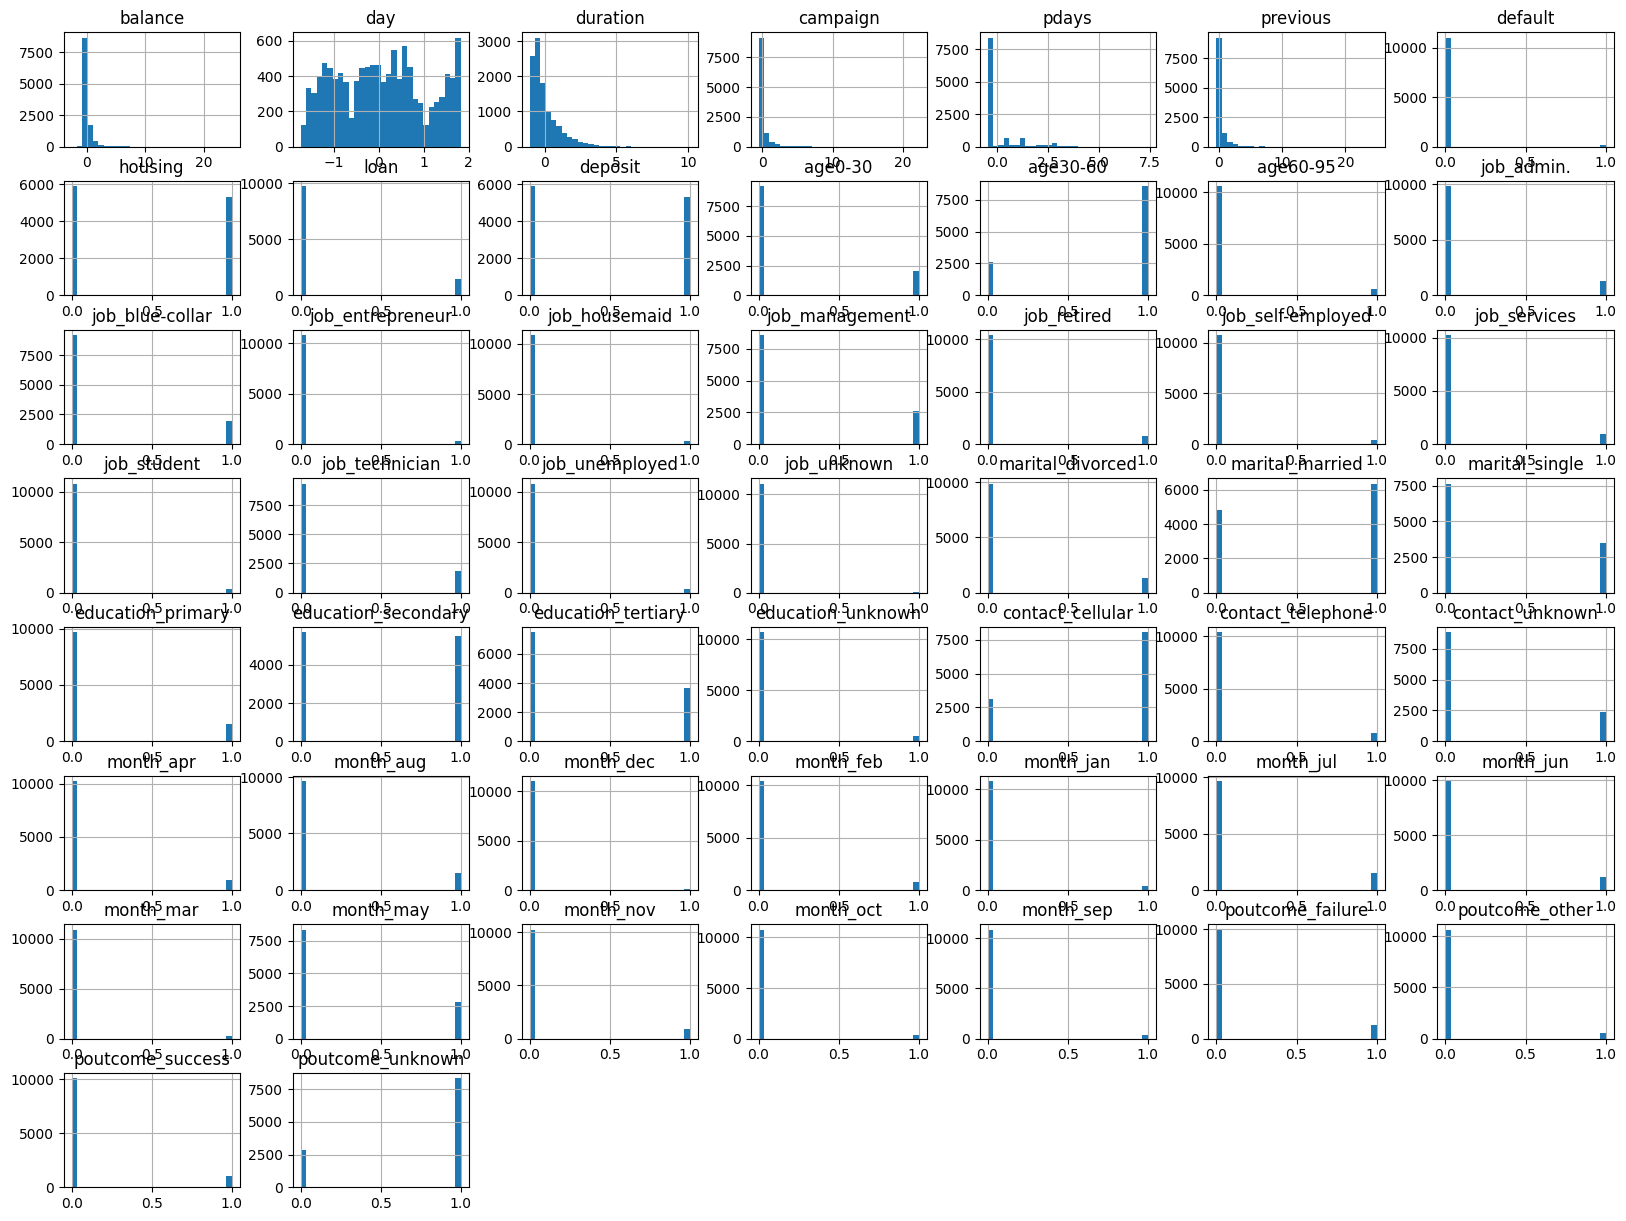

In [41]:
import matplotlib.pyplot as plt
bank_transformed_df.hist(bins=30, figsize=(20,15))
plt.show()

In [42]:
from pandas.plotting import scatter_matrix

# scatter_matrix(bank_prepared_df[attrs], figsize=(12, 8))

In [43]:
# strat_train_set.plot(kind="scatter", x = "age_bin", y = "deposit", alpha = 0.1) #, s="age"

In [44]:
# bank_prepared_df_temp = bank_prepared_df[bank_prepared_df['poutcome'] != 3] # unknown
# bank_prepared_df_temp

In [45]:
# corr_matrix = bank_prepared_df_temp.corr()
# corr_matrix["deposit"].sort_values(ascending=False)

# bank_prepared_df.plot(kind="scatter", x="poutcome", y="deposit", alpha = 0.1, s="poutcome")

In [46]:
# 11 / 07 / 2023

In [47]:
# bank_transformed_df -> dataframe con: drop age + add age_bin + full_pipeline + nomi_colonne

In [71]:
bank_prepared_df = bank_transformed_df

In [73]:
# bank_prepared_df

,balance,day,duration,campaign,pdays,previous,default,housing,loan,deposit,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
corr_matrix = bank_prepared_df.corr()
corr_matrix["deposit"].sort_values(ascending=False)

deposit                1.000000
duration               0.451919
poutcome_success       0.286642
contact_cellular       0.223252
age60-95               0.167604
pdays                  0.151593
previous               0.139867
month_mar              0.135438
month_oct              0.133783
month_sep              0.126901
job_retired            0.103827
job_student            0.099953
marital_single         0.094632
education_tertiary     0.094598
month_apr              0.090975
age0-30                0.090643
month_dec              0.086964
balance                0.081129
month_feb              0.051710
poutcome_other         0.044059
job_management         0.036301
job_unemployed         0.033487
poutcome_failure       0.020714
contact_telephone      0.016420
education_unknown      0.014355
marital_divorced       0.005228
job_unknown            0.001889
job_admin.            -0.000610
job_self-employed     -0.004707
job_technician        -0.011557
month_aug             -0.016621
month_ju

In [75]:
import numpy as np
# Define the correlation threshold
threshold_low = -0.08
threshold_high = 0.08

# Find columns
low_correlation_cols = np.where((threshold_low < corr_matrix["deposit"]) & (corr_matrix["deposit"] < threshold_high))

In [76]:
# Get the unique column indices
# unique_cols = set([low_correlation_cols[1][i] for i in range(len(low_correlation_cols[1]))])
todrop_cols = set(attrs[low_correlation_cols[0][i]] for i in range(len(low_correlation_cols[0])))

print(todrop_cols)

# Drop the identified columns from the dataset
bank_prepared_df = bank_prepared_df.drop(columns=list(todrop_cols), axis=1)

{'education_secondary', 'job_admin.', 'job_technician', 'month_feb', 'month_jul', 'marital_divorced', 'month_jan', 'job_management', 'default', 'poutcome_failure', 'day', 'job_entrepreneur', 'poutcome_other', 'contact_telephone', 'month_aug', 'job_services', 'education_primary', 'job_housemaid', 'job_unknown', 'month_jun', 'month_nov', 'education_unknown', 'job_self-employed', 'job_unemployed'}


In [77]:
bank_prepared_df.head()

,balance,duration,campaign,pdays,previous,housing,loan,deposit,age0-30,age30-60,...,contact_cellular,contact_unknown,month_apr,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
0,0.252525,1.930226,-0.554168,-0.481184,-0.36326,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.459974,3.154612,-0.554168,-0.481184,-0.36326,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.080160,2.929901,-0.554168,-0.481184,-0.36326,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.293762,0.596366,-0.554168,-0.481184,-0.36326,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.416876,0.867171,-0.186785,-0.481184,-0.36326,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [78]:
corr_matrix_dropped = bank_prepared_df.corr()
corr_matrix_dropped["deposit"].sort_values(ascending=False)

deposit               1.000000
duration              0.451919
poutcome_success      0.286642
contact_cellular      0.223252
age60-95              0.167604
pdays                 0.151593
previous              0.139867
month_mar             0.135438
month_oct             0.133783
month_sep             0.126901
job_retired           0.103827
job_student           0.099953
marital_single        0.094632
education_tertiary    0.094598
month_apr             0.090975
age0-30               0.090643
month_dec             0.086964
balance               0.081129
marital_married      -0.092157
job_blue-collar      -0.100840
loan                 -0.110580
campaign             -0.128081
month_may            -0.170507
age30-60             -0.172130
housing              -0.203888
poutcome_unknown     -0.230470
contact_unknown      -0.256136
Name: deposit, dtype: float64

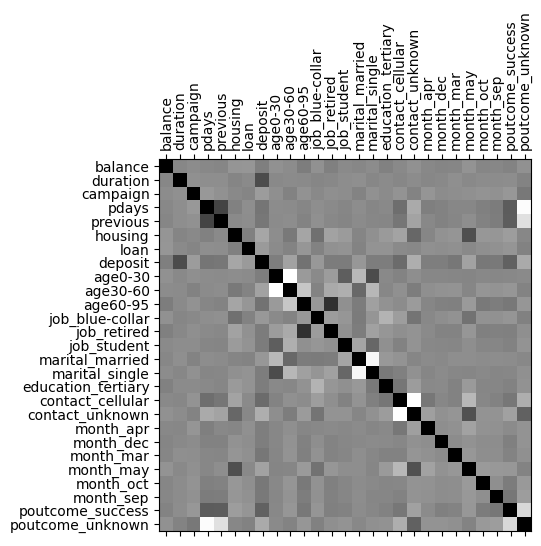

In [79]:
plt.matshow(bank_prepared_df.corr(), cmap='binary')
plt.xticks(np.arange(bank_prepared_df.shape[1]), bank_prepared_df.columns.values.tolist(), rotation=90)
plt.yticks(np.arange(bank_prepared_df.shape[1]), bank_prepared_df.columns.values.tolist(), rotation=0)

plt.show()

In [80]:
# bank_prepared_df.shape

In [84]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(bank_prepared_df, bank_prepared_df["deposit"]):
    strat_train_set = bank_prepared_df.loc[train_index]
    strat_test_set = bank_prepared_df.loc[test_index]

In [85]:
X_train = strat_train_set.drop(columns='deposit')
y_train = strat_train_set['deposit']

In [86]:
X_train.head()

,balance,duration,campaign,pdays,previous,housing,loan,age0-30,age30-60,age60-95,...,contact_cellular,contact_unknown,month_apr,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
8644,-0.310839,-0.348572,0.180598,-0.481184,-0.363260,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2632,0.317326,-0.322644,-0.554168,0.392352,3.127287,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3056,-0.430829,-0.489736,-0.554168,0.364766,0.073059,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1080,0.545524,1.161024,0.180598,-0.481184,-0.363260,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4006,-0.406645,-0.288073,-0.186785,-0.481184,-0.363260,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [87]:
y_train

8644    0.0
2632    1.0
3056    1.0
1080    1.0
4006    1.0
       ... 
3751    1.0
9695    0.0
3579    1.0
3386    1.0
9743    0.0
Name: deposit, Length: 8929, dtype: float64

In [88]:
# 12 / 07 / 2023

In [89]:
# Time for Classification Models
import time

# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [90]:
%%markdown
# Training Accuracy

# Training Accuracy


In [91]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [92]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_accuracy', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_accuracy'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

df_results = batch_classify(X_train, y_train)
df_results.sort_values(by='train_accuracy', ascending=False)

trained Logistic Regression in 0.10 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.91 s
trained Gradient Boosting Classifier in 0.76 s
trained Decision Tree in 0.03 s
trained Random Forest in 0.10 s
trained Neural Net in 2.16 s
trained Naive Bayes in 0.01 s


,classifier,train_accuracy,training_time
4,Decision Tree,1.000000,0.030167
5,Random Forest,0.996640,0.095176
1,Nearest Neighbors,0.858551,0.003228
2,Linear SVM,0.849591,0.911165
3,Gradient Boosting Classifier,0.845671,0.755096
6,Neural Net,0.834248,2.156391
0,Logistic Regression,0.826184,0.096563
7,Naive Bayes,0.711278,0.007326


In [93]:
%%markdown
# Cross-Validation Accuracy

# Cross-Validation Accuracy


In [94]:
from sklearn.model_selection import GridSearchCV

param_grid_log_reg = [
        {'penalty': ['l2'], 'C': [0.1, 0.3, 0.5, 0.7, 1]}
]
param_grid_knn_clf = [
        {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance']}
    ]
param_grid_svc_clf = [
        {'C': [0.1, 0.3, 0.5, 0.7, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    ]
param_grid_grad_clf = [
        {'loss': ['log_loss', 'exponential'], 'max_features': ['sqrt', 'log2', None],
        'learning_rate': [0.05, 0.07, 0.1, 0.3]}
    ]
param_grid_tree_clf = [
        {'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random']}
    ]
param_grid_rand_clf = [
        {'n_estimators': [30, 100, 150], 'max_features': ['log2', 'sqrt']}
    ]
param_grid_neural_clf = [
        {'solver': ['sgd', 'adam'], 'max_iter': [1000, 1500]}
    ]
param_grid_NB = [
    {'priors': [None]}
]


dict_classifiers = {
    "Logistic Regression": [LogisticRegression(), param_grid_log_reg],
    "Nearest Neighbors": [KNeighborsClassifier(), param_grid_knn_clf],
    "SVM": [SVC(), param_grid_svc_clf],
    "Gradient Boosting Classifier": [GradientBoostingClassifier(), param_grid_grad_clf],
    "Decision Tree": [tree.DecisionTreeClassifier(), param_grid_tree_clf],
    "Random Forest": [RandomForestClassifier(), param_grid_rand_clf],
    "Neural Net": [MLPClassifier(), param_grid_neural_clf],
    "Naive Bayes": [GaussianNB(), param_grid_NB]
}

In [95]:
no_classifiers = len(dict_classifiers.keys())
df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,2)),
                          columns = ['classifier', 'val_accuracy'])

count=0
for key, classifier in dict_classifiers.items():
    grid_search = GridSearchCV(classifier[0], classifier[1], cv=3, n_jobs=-1, 
                               scoring='accuracy')
                               #return_train_score=True)
    grid_search.fit(X_train, y_train)
    df_results.loc[count,'classifier'] = key
    df_results.loc[count,'val_accuracy'] = grid_search.cv_results_['mean_test_score'].mean()
    count += 1
    print(key,
          "\n   Best params:", grid_search.best_params_,
          "\n   Accuracy:", grid_search.cv_results_['mean_test_score'].mean())

Logistic Regression 
   Best params: {'C': 0.5, 'penalty': 'l2'} 
   Accuracy: 0.8252418858199603
Nearest Neighbors 
   Best params: {'n_neighbors': 7, 'weights': 'uniform'} 
   Accuracy: 0.7944894674132508
SVM 
   Best params: {'C': 0.7, 'kernel': 'rbf'} 
   Accuracy: 0.8059346247605597
Gradient Boosting Classifier 
   Best params: {'learning_rate': 0.3, 'loss': 'exponential', 'max_features': None} 
   Accuracy: 0.8322401989902474
Decision Tree 
   Best params: {'criterion': 'log_loss', 'splitter': 'best'} 
   Accuracy: 0.7618239362190975
Random Forest 
   Best params: {'max_features': 'sqrt', 'n_estimators': 150} 
   Accuracy: 0.8241117923093378
Neural Net 
   Best params: {'max_iter': 1000, 'solver': 'sgd'} 
   Accuracy: 0.8238315925380124
Naive Bayes 
   Best params: {'priors': None} 
   Accuracy: 0.7097089860375183


In [96]:
df_results.sort_values(by='val_accuracy', ascending=False)

,classifier,val_accuracy
3,Gradient Boosting Classifier,0.832240
0,Logistic Regression,0.825242
5,Random Forest,0.824112
6,Neural Net,0.823832
2,SVM,0.805935
1,Nearest Neighbors,0.794489
4,Decision Tree,0.761824
7,Naive Bayes,0.709709


In [97]:
%%markdown
# Confusion Matrix

# Confusion Matrix


In [98]:
'''
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying 
potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four 
terms the True Positives, False Positives, True Negatives and False Negatives.


Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" class 
or potenial clients that are not willing to suscribe a term deposit. 


False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No" class 
or potential clients that are not willing to suscribe a term depositt. 


False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" class 
or potential clients that are willing to suscribe a term deposit. 


True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" class 
or potenial clients that are willing to suscribe a term deposit.
'''

'\nThe main purpose of a confusion matrix is to see how our model is performing when it comes to classifying \npotential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four \nterms the True Positives, False Positives, True Negatives and False Negatives.\n\n\nPositive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.\n\n\nTrue Negatives (Top-Left Square): This is the number of correctly classifications of the "No" class \nor potenial clients that are not willing to suscribe a term deposit. \n\n\nFalse Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No" class \nor potential clients that are not willing to suscribe a term depositt. \n\n\nFalse Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" class \nor potential clients that are willing to suscribe a term deposit. \n\n\nTrue Positives (Bottom-Right Squar

In [99]:
final_GB_clf = GradientBoostingClassifier(learning_rate=0.1, loss='log_loss', max_features='log2').fit(X_train, y_train)

GB_clf_predictions = final_GB_clf.predict(X_train)

from sklearn.model_selection import cross_val_predict

GB_clf_predictions_cross_val = cross_val_predict(final_GB_clf, X_train, y_train, cv=3)

In [100]:
from sklearn.metrics import accuracy_score

print ("Gradient Boost Classifier accuracy is %2.3f" % accuracy_score(y_train, GB_clf_predictions))
print ("Gradient Boost Classifier accuracy (cross_val_predict) is %2.3f" % accuracy_score(y_train, GB_clf_predictions_cross_val))

Gradient Boost Classifier accuracy is 0.844
Gradient Boost Classifier accuracy (cross_val_predict) is 0.835


In [101]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, GB_clf_predictions)

conf_matrix

array([[3946,  752],
       [ 644, 3587]])

In [102]:
# disegno matrice (box 55 kaggle)

In [103]:
%%markdown
# Precision, Recall, F1

# Precision, Recall, F1


In [104]:
'''
Precision and Recall:

Recall: Is the total number of "Yes" in the label column of the dataset. 
So how many "Yes" labels does our model detect. 

Precision: Means how sure is the prediction of our model that the actual label is a "Yes".
'''

'\nPrecision and Recall:\n\nRecall: Is the total number of "Yes" in the label column of the dataset. \nSo how many "Yes" labels does our model detect. \n\nPrecision: Means how sure is the prediction of our model that the actual label is a "Yes".\n'

In [105]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precs_GB = precision_score(y_train, GB_clf_predictions)
recalls_GB = recall_score(y_train, GB_clf_predictions)
F1_score_GB = f1_score(y_train, GB_clf_predictions)
print("precision: ", precs_GB, "\trecall: ", recalls_GB, "\tF1: ", F1_score_GB)

precision:  0.8266881769993086 	recall:  0.8477901205388797 	F1:  0.8371061843640606


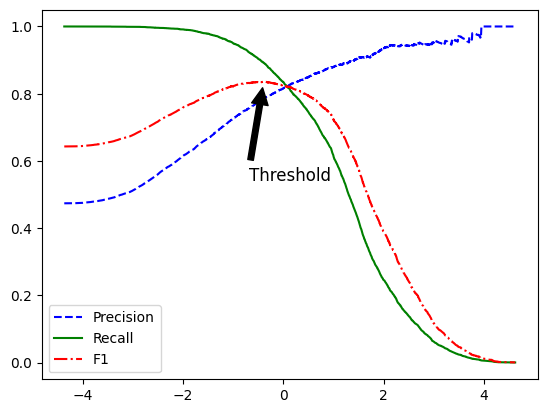

In [106]:
# calcoliamo gli y_scores con la cross_val_predict
y_scores_GB = cross_val_predict(final_GB_clf, X_train, y_train, cv=3, method="decision_function")

# facciamo il plot di thresholds, recalls e precisions
from sklearn.metrics import precision_recall_curve
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_train, y_scores_GB)
F1_GB = 2*((precisions_GB*recalls_GB)/(precisions_GB+recalls_GB))

def plot_precision_recall_vs_threshold_and_recall(precisions, recalls, thresholds, F1): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") # b = blue; -- = dashed line
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") # g = green; - = linea continua
    plt.plot(thresholds, F1[:-1], "r-.", label="F1") # g = green; - = linea continua
    plt.legend()
    # highlight the threshold, add the legend, axis label and grid

plot_precision_recall_vs_threshold_and_recall(precisions_GB, recalls_GB, thresholds_GB, F1_GB)
plt.annotate('Threshold', xy=(-0.4, 0.83), xytext=(-10, -70),
                 textcoords="offset points",
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, 
                 color='k')
plt.show()

In [107]:
best_th_GB = thresholds_GB[np.argmax(F1_GB)] # migliore threshold da utilizzare
print("La threshold da utilizzare è il massimo dell'F1 score ovvero %2.6f" %best_th_GB)

La threshold da utilizzare è il massimo dell'F1 score ovvero -0.355970


In [108]:
predictions_GB = (y_scores_GB > best_th_GB)

prec_GB = precision_score(y_train, predictions_GB)
recall_GB = recall_score(y_train, predictions_GB)

print("recall: ", recall_GB, "\t precision:", prec_GB)

from sklearn.metrics import f1_score
print("f1 score: ", f1_score(y_train, predictions_GB))

recall:  0.8879697471047033 	 precision: 0.7892857142857143
f1 score:  0.8357246135023912


In [109]:
# nel nostro caso conviene avere una recall piu alta (numero maggiore di persone da chiamare)ù
# perchè al massimo chiude il telefono e non aderisce


# recall = TP/(TP+FN) --> 
#     persone che abbiamo contattato / (persone che abbiamo contattato + persone che avremmo dovuto contattare)

# se il recall è alto allora le persone che avremmo dovuto contattare ma che non abbiamo contattato
# sono poche

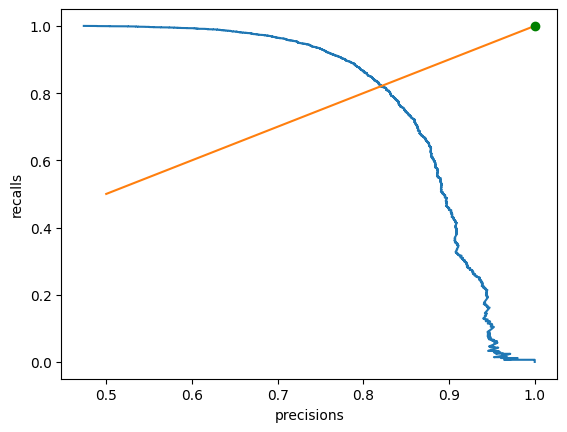

In [110]:
plt.plot(precisions_GB, recalls_GB)
plt.plot([0.5,1],[0.5,1]) # bisettrice
plt.plot(1,1, color="green", marker="o") # intersezione ideale
plt.xlabel("precisions")
plt.ylabel("recalls")
plt.show()

In [111]:
%%markdown
# ROC curves e Areas Under the Curves

# ROC curves e Areas Under the Curves


In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel("false positive rate")
    plt.ylabel("recall (true positive rate)")
    # Add axis labels and grid

# Gradient Boosting Classifier
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_train, y_scores_GB)

# Neural Net
final_NC_clf = MLPClassifier(max_iter=1000, solver='sgd').fit(X_train, y_train)
y_scores_NC = cross_val_predict(final_NC_clf, X_train, y_train, cv=3, method="predict_proba")
fpr_NC, tpr_NC, thresholds = roc_curve(y_train, y_scores_NC[:,1])

# Random Forest
final_RF_clf = RandomForestClassifier(max_features='sqrt', n_estimators=150).fit(X_train, y_train)
y_scores_RF = cross_val_predict(final_RF_clf, X_train, y_train, cv=3, method="predict_proba")
fpr_RF, tpr_RF, thresholds = roc_curve(y_train, y_scores_RF[:,1])

# Logistic Regression
final_LR = LogisticRegression(C=0.5, penalty='l2')
y_scores_LR = cross_val_predict(final_LR, X_train, y_train, cv=3, method="predict_proba")
fpr_LR, tpr_LR, thresholds = roc_curve(y_train, y_scores_LR[:,1])

# Naive Bayes
final_NB = GaussianNB()
y_scores_NB = cross_val_predict(final_NB, X_train, y_train, cv=3, method="predict_proba")
fpr_NB, tpr_NB, thresholds = roc_curve(y_train, y_scores_NB[:,1])

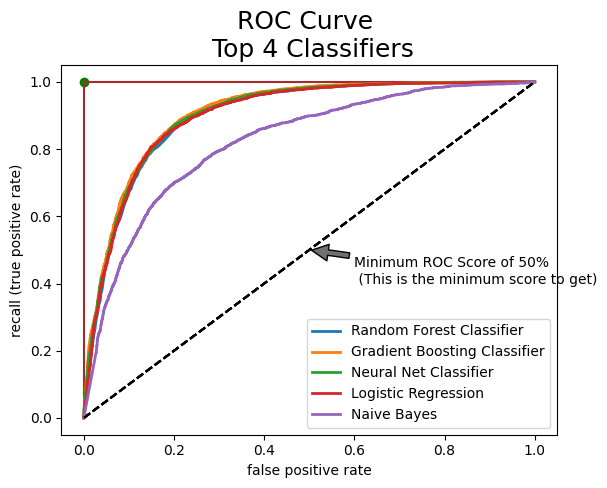

In [113]:
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(0,1, color="green", marker="o") # ideale
plt.plot([0,1],[1,1], color='brown')
plt.plot([0,0],[0,1], color='brown') # ideale
plot_roc_curve(fpr_RF, tpr_RF, 'Random Forest Classifier')
plot_roc_curve(fpr_GB, tpr_GB, 'Gradient Boosting Classifier')
plot_roc_curve(fpr_NC, tpr_NC, 'Neural Net Classifier')
plot_roc_curve(fpr_LR, tpr_LR, 'Logistic Regression')
plot_roc_curve(fpr_NB, tpr_NB, 'Naive Bayes')
plt.legend()
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.4),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.show()

In [114]:
print("L'area sotto la ROC Curve dovrebbe avvicinarsi ad 1, noi abbiamo:")
print("Gradient Boosting: ", roc_auc_score(y_train, y_scores_GB))
print("Random Forest: ", roc_auc_score(y_train, y_scores_RF[:,1]))
print("Neural Net: ", roc_auc_score(y_train, y_scores_NC[:,1]))
print("Logistic Regression: ", roc_auc_score(y_train, y_scores_LR[:,1]))
print("...")
print("Naive Bayes: ", roc_auc_score(y_train, y_scores_NB[:,1]))

L'area sotto la ROC Curve dovrebbe avvicinarsi ad 1, noi abbiamo:
Gradient Boosting:  0.9078732920539565
Random Forest:  0.899713330393287
Neural Net:  0.9032321794406244
Logistic Regression:  0.8999295073088123
...
Naive Bayes:  0.8204423572329316


In [115]:
# applicare trasformazioni sul test set
# valutare modello su test set

In [117]:
strat_test_set

,balance,duration,campaign,pdays,previous,housing,loan,deposit,age0-30,age30-60,...,contact_cellular,contact_unknown,month_apr,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
8220,-0.352076,0.247776,-0.186785,-0.481184,-0.363260,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2521,-0.357346,0.308275,-0.554168,-0.481184,-0.363260,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7949,-0.250069,-0.786470,-0.186785,1.229107,0.945695,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7879,-0.536556,-0.299597,0.180598,-0.481184,-0.363260,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
616,-0.532836,1.256094,0.180598,-0.481184,-0.363260,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11141,-0.433619,-0.201646,-0.186785,-0.481184,-0.363260,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3589,-0.178757,-0.178598,-0.554168,-0.481184,-0.363260,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4200,0.208498,-0.063362,-0.554168,-0.481184,-0.363260,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1959,-0.447572,0.628056,0.915364,2.829057,0.073059,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_test = strat_test_set["deposit"]

predicted = rf_reg.predict(housing_test)

final_mse = mean_squared_error(housing_test_labels, predicted)
final_rmse = np.sqrt(final_mse) 
print(final_rmse)
# FINAL EVALUATION ON TEST SET: GENERALIZATION MEASURE